<a href="https://colab.research.google.com/github/Areliortiz/Simulaci-n-/blob/main/AgujaDeBufon_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Experimento de la Aguja de Buffon

Se trata de lanzar una aguja sobre una superficie horizontal en las que están trazadas unas lineas paralelas separadas a la misma distancia
Sea $x$ la distancia entre el centro de la aguja a la línea más cercana

$\text{Variables del Experimento}$\
$L$: Longitud de la aguja.\
$\theta$: Ángulo.\
$X$: Distancia.\
$D$: Distancia entre las líneas paralelas.

$\text{Distribución de las Variables}$

$X$ se distribuye entre 0 y \(D/2\).\
$\theta$ se distribuye entre 0 y $\pi$.\

$\text{Cálculo de la Probabilidad de Cruce}$

La proyección de la aguja en la dirección perpendicular es:$
[(\frac{L}{2}) \sin(\theta)
]$

##La condición para que la aguja cruce una línea es:
$[
\left(\frac{L}{2}\right) \sin(\theta) \geq X
]$

$\text{Derivación de \(\pi\)}$

Queremos encontrar la probabilidad $p$ de que la aguja cruce una línea:\
$
p = \frac{1}{D/2} \frac{1}{\pi} \int_{0}^{\pi} \int_{0}^{\left(\frac{L}{2}\right) \sin(\theta)} dx \, d\theta
$\

$
p = \frac{2}{D \pi} \int_{0}^{\pi} \left(\frac{L}{2}\right) \sin(\theta) \, d\theta
$


$
p = \frac{L}{D \pi} \left[-\cos(\theta)\right]_0^{\pi} = \frac{2L}{D \pi}
$

Despejamos $\pi:$\
$
\pi \approx \frac{2L n}{D c}
$

donde:\
p=c/n\
n: Número total de lanzamientos.\
c: Número de cruces.

Esta formulación permite estimar $\pi$ basándose en los resultados experimentales del número de cruces de la aguja con las líneas paralelas.


In [67]:
#importamos las librerías
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#codigo para estimar pi en base a la probabilidad de cruce

def cruce(n):
    cruces = 0
    lista=[]
    for i in range(n):
      theta = 1/2*np.pi*rnd.uniform(0,1)            #Generamos ángulos aleatorios para las agujas
      x = rnd.uniform(0, 1 / 2)       #Generamos posiciones aleatorias del centro de la aguja respecto a la línea más cercana
      if x <= (1 / 2) * np.sin(theta):    #Calculamos si la aguja cruza alguna línea
        cruces +=1
      prob=cruces/((i+1)*2) #probabilidad de 2/pi
      lista.append(prob*(np.pi)**2)

    return lista,prob

In [106]:
#generamos el experimento
lista, prob =cruce(1000)
media=np.mean(lista) #Calcula la media
print(media)
desve=np.std(lista) #Calcula la desviación estándar
print(desve)


3.1486528017793125
0.13854783191308584


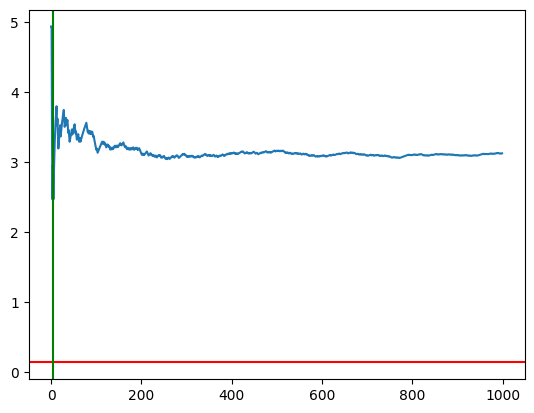

In [107]:
plt.plot(lista)                      #grafica la lista completa
plt.axhline(desve,color="red")
plt.axvline(media,color="green")
plt.show()

Para modificar la función y convertirla en una corrida de la simulación: lista-->lista[-1] y fijarnos N=600,ya que se encuentra en el estado estacionario


In [108]:
#generamos la simulacion del experimento
def simulación (N):             # crea funcion para generar la simulacion del experimento
   r=[]
   for i in range(n):
      R_1,R_2=cruce (600)
      r.append(R_1[-1])
   return r


(array([  3.,  13.,  59., 174., 238., 249., 174.,  66.,  20.,   4.]),
 array([2.79638791, 2.86465268, 2.93291744, 3.0011822 , 3.06944697,
        3.13771173, 3.2059765 , 3.27424126, 3.34250602, 3.41077079,
        3.47903555]),
 <BarContainer object of 10 artists>)

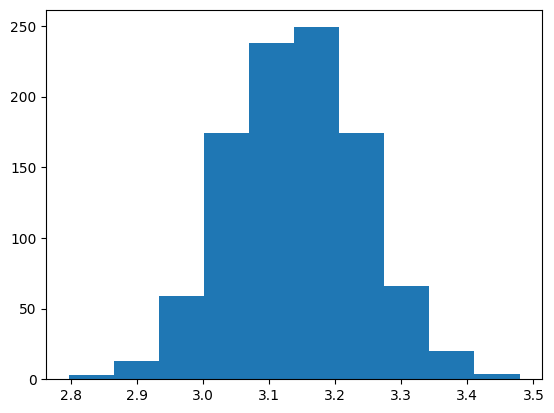

In [109]:
S=simulación (1000) #generamos distribucion
plt.hist(S)

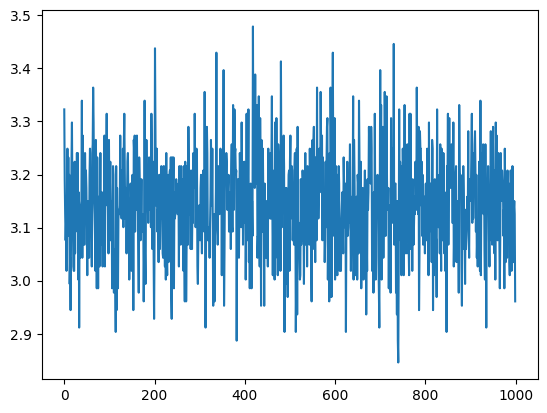

In [59]:
plt.plot(S)

In [110]:
#calculamos promedio
np.average(S)

3.14174182097677

Ahora podemos usar la desigualdad de chebyshev
$P(|Z_N−π|≥∈)≤\frac{V(Z_N)}{∈^2 }$
Para calcular N,


In [111]:
#ESTIMADOR N
P=abs(media-np.pi)
print(P)
N_final=((np.pi)**2)*(desve**2)/(2*P*(desve**2))
print(" EL VALOR DE N:", round(N_final))

0.0070601481895193885
 EL VALOR DE N: 699
